## <u>Data Science Using Python</u>

# Module 8 - Web Scraping

## Demo 2 - Scraping Rotten Tomatoes Movie Ratings

In this demo, you will use Beautiful Soup to fetch movie ratings from RottenTomatoes using Beautiful Soup

<h3>1. Importing Required Libraries

In [1]:
import requests
import csv #to store the data
import pandas as pd #For storing data
import matplotlib.pyplot as plt #For Visualisation
from bs4 import BeautifulSoup

<h3>2. Sending Request

In [2]:
response=requests.get('https://www.rottentomatoes.com/top/bestofrt/')
response.status_code # status code 200 defines Success - OK

200

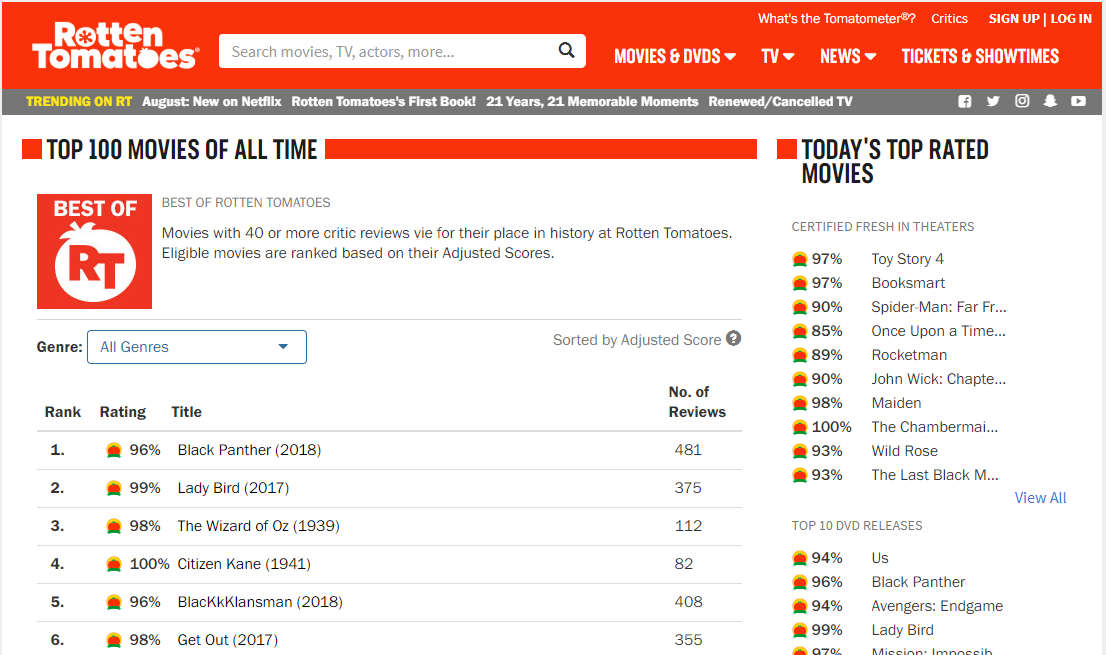

<h3>3. Parsing Content

<h3><ul><li>Inspecting Webpage
    
    - Navigate to the first movie and inspect it

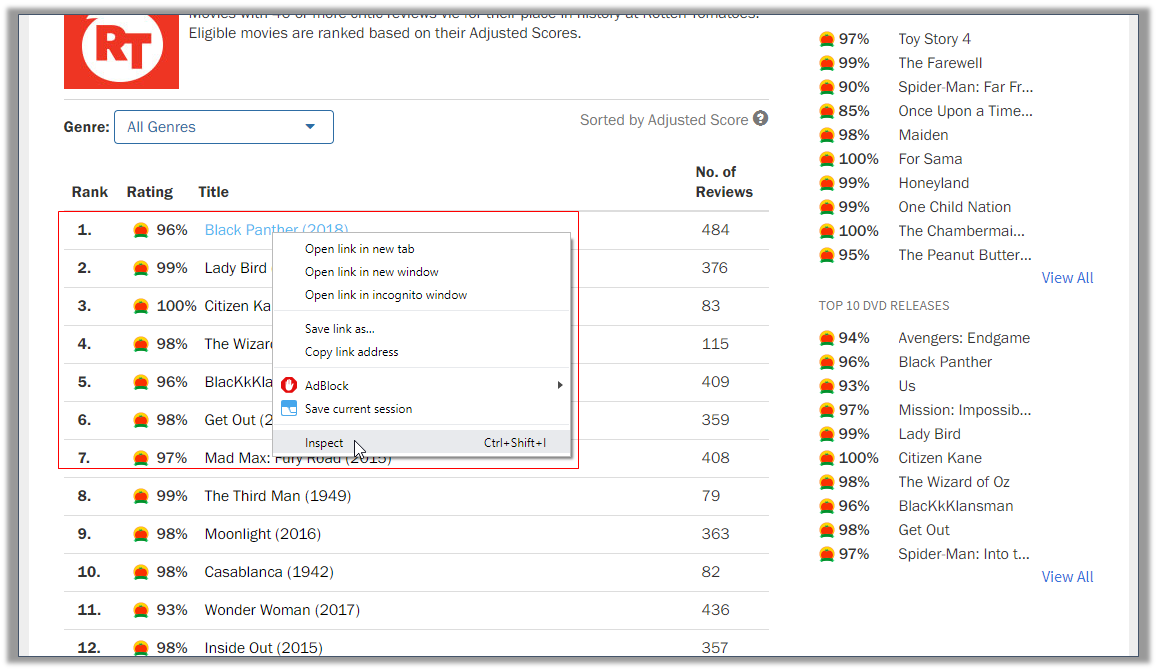

<h3><ul><li>After inspection we can see all the required data is in a table

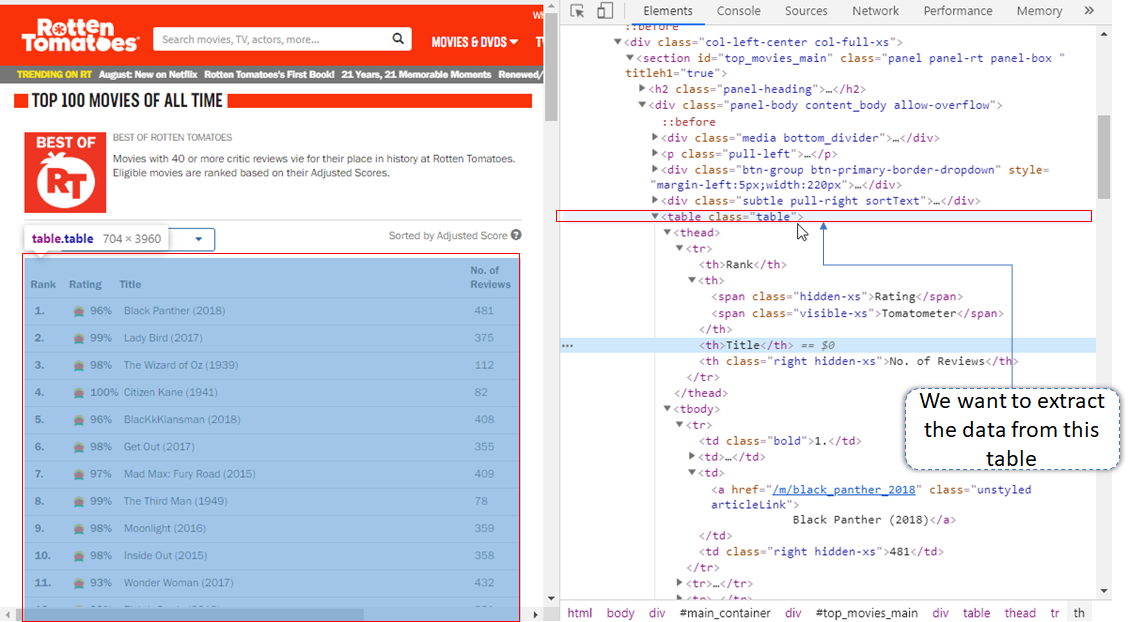

<h3><ul><li>Creating BeautifulSoup object and parsing the table

In [3]:
soup=BeautifulSoup(response.content,'html.parser')
movie_list=soup.find('table','table')

<h3>4. Parsing data 

In [4]:
movie_rating=movie_list.find_all('span','tMeterScore')
movie_name=movie_list.find_all('a',attrs={'class':'unstyled articleLink'})
movie_reviews=movie_list.find_all('td','right hidden-xs')

In [5]:
#Now we have collected required tags
movie_name[1],movie_rating[1],movie_reviews[1]

(<a class="unstyled articleLink" href="/m/lady_bird">
             Lady Bird (2017)</a>,
 <span class="tMeterScore"> 99%</span>,
 <td class="right hidden-xs">376</td>)

In [6]:
for i in range(100):
    movie_name[i]=movie_name[i].string
    movie_rating[i]=movie_rating[i].string
    movie_reviews[i]=movie_reviews[i].string

In [7]:
#Now we have extracted the data
movie_name[1],movie_rating[1],movie_reviews[1]

('\n            Lady Bird (2017)', '\xa099%', '376')

<h3>5. Organizing the data

In [8]:
'''
We need our data as:
Movie Name, Movie Year, Movie Ratings, Movie Reviews
So we have defined a function Movie_name_year which splits movie name and year.
'''
def Movie_name_year(movie):
    movie=movie[1:]
    movie=str.lstrip(movie) #Stripping any whitespaces from left
    return movie[:-6], movie[-5:-1]

In [9]:
movie_year=[]
for i in range(100):
    name, year=Movie_name_year(movie_name[i])
    movie_name[i]=name
    movie_year.append(year)

<h3>6. Cleaning the data
    


In [10]:
'''
We need to:
clean the ratings 
Convert year, reviews and ratings to integer
'''
y=[]
for i in range(100):
    movie_year[i]=int(movie_year[i])
    movie_reviews[i]=int(movie_reviews[i])
    movie_rating[i]=int(movie_rating[i][1:-1])

<h3>7. Storing the data

In [11]:
#Here we are going to store the data into a csv file
#Creating a DataFrame to store
movie=pd.DataFrame({'Name':movie_name,'Year':movie_year,'Ratings':movie_rating,'Reviews':movie_reviews})
movie.head()

,Name,Year,Ratings,Reviews
0,Black Panther,2018,96,484
1,Lady Bird,2017,99,376
2,Citizen Kane,1941,100,83
3,The Wizard of Oz,1939,98,115
4,BlacKkKlansman,2018,96,409


In [12]:
movie.to_csv('TopMovies(RottenTomatoes).csv')

### 8. Visualizing Data

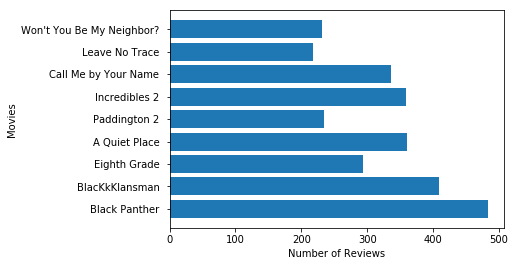

In [13]:
#Number of Reviews of movies released in 2018
plt.barh(movie[movie.Year==2018].Name,movie[movie.Year==2018].Reviews)
plt.xlabel('Number of Reviews')
plt.ylabel('Movies',rotation=90)
plt.show()

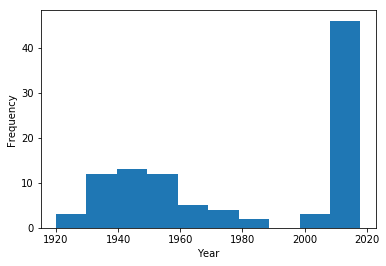

In [14]:
plt.hist(movie.Year,bins=10)
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

#### From the above histogram, we can say that most of the popular movies were released after year 2000.

##### Conclusion: This code demonstrate how to fetch, save and visualise data using Beautiful Soup, Pandas and Matplotlib.